# Google Colab: Comandi Base e Tensor Core

## 1. Introduzione a Google Colab

In [1]:

# Eseguiamo un semplice comando Python
print("Hello, Colab!")


Hello, Colab!


## 2. Verificare la GPU disponibile

In [2]:

# Controlliamo se abbiamo una GPU disponibile
import torch
print("GPU disponibile:", torch.cuda.is_available())
print("Nome GPU:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "Nessuna GPU disponibile")


GPU disponibile: True
Nome GPU: Tesla T4


## 3. Operazioni matematiche di base

In [3]:

import numpy as np

# Operazioni con scalari
a = 5
b = 3
print("Somma:", a + b)
print("Prodotto:", a * b)

# Operazioni con vettori
v1 = np.array([1, 2, 3])
v2 = np.array([4, 5, 6])
print("Somma vettoriale:", v1 + v2)
print("Prodotto scalare:", np.dot(v1, v2))

# Operazioni con matrici
M1 = np.array([[1, 2], [3, 4]])
M2 = np.array([[5, 6], [7, 8]])
print("Prodotto matrice:", np.matmul(M1, M2))


Somma: 8
Prodotto: 15
Somma vettoriale: [5 7 9]
Prodotto scalare: 32
Prodotto matrice: [[19 22]
 [43 50]]


## 4. Tensor Core su GPU NVIDIA

In [ ]:

import torch

# Creiamo tensori su CPU e GPU
tensor_cpu = torch.randn((1024, 1024))
tensor_gpu = tensor_cpu.to("cuda") if torch.cuda.is_available() else tensor_cpu

print("Tensor CPU:", tensor_cpu.shape)
print("Tensor GPU:", tensor_gpu.shape)


Tensor CPU: torch.Size([1024, 1024])
Tensor GPU: torch.Size([1024, 1024])


## 5. Benchmark prestazioni CPU vs GPU

In [ ]:
import torch
import time

# Definisci la dimensione della matrice
matrix_size = 1000

# Funzione per misurare il tempo di esecuzione
def measure_time(device):
    # Crea due matrici casuali
    A = torch.randn(matrix_size, matrix_size, device=device)
    B = torch.randn(matrix_size, matrix_size, device=device)

    # Sincronizza e misura il tempo di esecuzione
    torch.cuda.synchronize() if device == 'cuda' else None
    start_time = time.time()
    C = torch.matmul(A, B)
    torch.cuda.synchronize() if device == 'cuda' else None
    end_time = time.time()

    return end_time - start_time

# Misura il tempo su CPU
cpu_time = measure_time('cpu')
print(f"Tempo su CPU: {cpu_time:.6f} secondi")

# Misura il tempo su GPU (se disponibile)
if torch.cuda.is_available():
    gpu_time = measure_time('cuda')
    print(f"Tempo su GPU: {gpu_time:.6f} secondi")
else:
    print("GPU non disponibile.")


Tempo su CPU: 0.018860 secondi
Tempo su GPU: 0.000974 secondi


Testing matrix size: 5000x5000
Testing matrix size: 10000x10000
Testing matrix size: 15000x15000
Testing matrix size: 20000x20000
Testing matrix size: 25000x25000


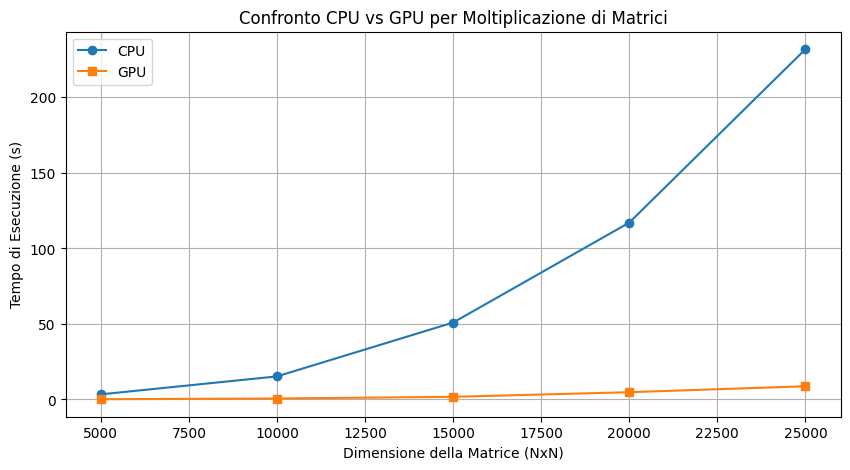

In [ ]:
import torch
import time
import matplotlib.pyplot as plt
import numpy as np

# Definiamo i valori delle dimensioni della matrice da 5,000 a 50,000 con step di 5,000
matrix_sizes = np.arange(5000, 25001, 5000)

# Liste per memorizzare i tempi
cpu_times = []
gpu_times = []

# Funzione per misurare il tempo di esecuzione
def measure_time(matrix_size, device):
    if device == "cuda":
        torch.cuda.empty_cache()  # Libera memoria GPU

    # Creiamo due matrici casuali
    A = torch.randn(matrix_size, matrix_size, device=device)
    B = torch.randn(matrix_size, matrix_size, device=device)

    if device == "cuda":
        torch.cuda.synchronize()  # Assicura misurazione accurata

    start_time = time.time()
    C = torch.matmul(A, B)  # Usa Tensor Core automaticamente con FP16
    if device == "cuda":
        torch.cuda.synchronize()

    end_time = time.time()

    return end_time - start_time

# Loop sulle diverse dimensioni della matrice
for size in matrix_sizes:
    print(f"Testing matrix size: {size}x{size}")

    # Tempo su CPU
    cpu_time = measure_time(size, "cpu")
    cpu_times.append(cpu_time)

    # Tempo su GPU (se disponibile)
    if torch.cuda.is_available():
        gpu_time = measure_time(size, "cuda")
    else:
        gpu_time = None

    gpu_times.append(gpu_time)

# Creiamo il grafico dei risultati
plt.figure(figsize=(10, 5))
plt.plot(matrix_sizes, cpu_times, label="CPU", marker="o")
if torch.cuda.is_available():
    plt.plot(matrix_sizes, gpu_times, label="GPU", marker="s")

plt.xlabel("Dimensione della Matrice (NxN)")
plt.ylabel("Tempo di Esecuzione (s)")
plt.title("Confronto CPU vs GPU per Moltiplicazione di Matrici")
plt.legend()
plt.grid(True)

# Mostrare il grafico
plt.show()
